In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Kalimantan Selatan.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  385 non-null    datetime64[ns]
 1   Tn       331 non-null    float64       
 2   Tx       303 non-null    float64       
 3   Tavg     242 non-null    float64       
 4   RH_avg   242 non-null    float64       
 5   RR       285 non-null    float64       
 6   ss       343 non-null    float64       
 7   ff_x     347 non-null    float64       
 8   ddd_x    347 non-null    float64       
 9   ff_avg   347 non-null    float64       
 10  ddd_car  347 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 33.2+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_16472\595786674.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,25.0,32.4,0.0,28.2
1,2023-02-01,24.2,33.6,0.0,28.4
2,2023-03-01,24.6,32.0,5.2,NaN
3,2023-04-01,NaN,NaN,NaN,NaN
4,2023-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...
380,2023-12-16,24.3,34.0,0.0,28.0
381,2023-12-17,23.4,29.0,127.6,26.4
382,2023-12-18,24.6,33.0,0.0,28.0
383,2023-12-19,24.8,33.8,0.0,28.6


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

62

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,25.0,32.4,0.0,28.2
1,31,31,2023-01-02,NaN,NaN,NaN,NaN
2,59,59,2023-01-03,NaN,NaN,NaN,NaN
3,90,90,2023-01-04,24.0,27.9,1.0,25.6
4,120,120,2023-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
349,349,380,2023-12-16,24.3,34.0,0.0,28.0
350,350,381,2023-12-17,23.4,29.0,127.6,26.4
351,351,382,2023-12-18,24.6,33.0,0.0,28.0
352,352,383,2023-12-19,24.8,33.8,0.0,28.6


In [8]:
#cek null
df1.isnull().sum()

level_0      0
index        0
Tanggal      0
Tn          52
Tx          80
RR          92
Tavg       136
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          0
Tx          0
RR          0
Tavg       68
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

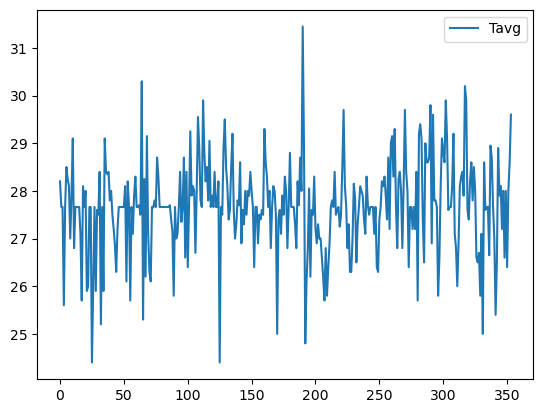

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

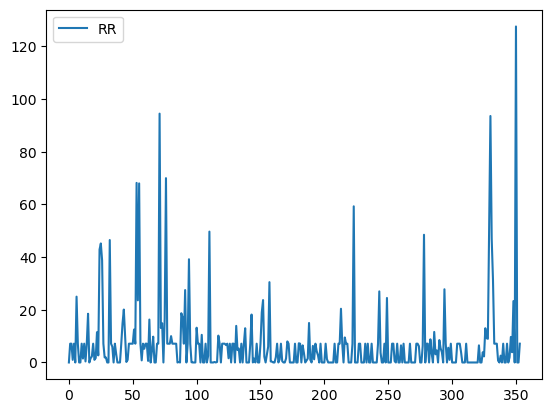

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,25.000000,32.400000,0.000000,28.200000,33.422263,27.662238,7.138168
1,31,31,2023-01-02,23.634437,33.422263,7.138168,27.662238,33.422263,27.662238,7.138168
2,59,59,2023-01-03,23.634437,33.422263,7.138168,27.662238,27.900000,25.600000,1.000000
3,90,90,2023-01-04,24.000000,27.900000,1.000000,25.600000,33.422263,27.662238,7.138168
4,120,120,2023-01-05,23.634437,33.422263,7.138168,27.662238,34.600000,28.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,380,2023-12-16,24.300000,34.000000,0.000000,28.000000,29.000000,26.400000,127.600000
350,350,381,2023-12-17,23.400000,29.000000,127.600000,26.400000,33.000000,28.000000,0.000000
351,351,382,2023-12-18,24.600000,33.000000,0.000000,28.000000,33.800000,28.600000,0.000000
352,352,383,2023-12-19,24.800000,33.800000,0.000000,28.600000,33.422263,29.600000,7.138168


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.000000,28.200000,27.662238,7.138168
1,7.138168,27.662238,27.662238,7.138168
2,7.138168,27.662238,25.600000,1.000000
3,1.000000,25.600000,27.662238,7.138168
4,7.138168,27.662238,28.500000,0.000000
...,...,...,...,...
349,0.000000,28.000000,26.400000,127.600000
350,127.600000,26.400000,28.000000,0.000000
351,0.000000,28.000000,28.600000,0.000000
352,0.000000,28.600000,29.600000,7.138168


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.000000,28.200000,27.662238,7.138168
1,7.138168,27.662238,27.662238,7.138168
2,7.138168,27.662238,25.600000,1.000000
3,1.000000,25.600000,27.662238,7.138168
4,7.138168,27.662238,28.500000,0.000000
...,...,...,...,...
348,23.300000,26.600000,28.000000,0.000000
349,0.000000,28.000000,26.400000,127.600000
350,127.600000,26.400000,28.000000,0.000000
351,0.000000,28.000000,28.600000,0.000000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.000000,28.200000,27.662238,7.138168,0
1,7.138168,27.662238,27.662238,7.138168,1
2,7.138168,27.662238,25.600000,1.000000,2
3,1.000000,25.600000,27.662238,7.138168,3
4,7.138168,27.662238,28.500000,0.000000,4
...,...,...,...,...,...
348,23.300000,26.600000,28.000000,0.000000,348
349,0.000000,28.000000,26.400000,127.600000,349
350,127.600000,26.400000,28.000000,0.000000,350
351,0.000000,28.000000,28.600000,0.000000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,29.4
283,283,29.1
284,284,27.4
285,285,26.5
286,286,29.0
...,...,...
348,348,26.6
349,349,28.0
350,350,26.4
351,351,28.0


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.0125561 , 27.96618215, 27.69957086, 27.55880948, 27.95291024,
       27.89080506, 27.89162483, 27.90817585, 28.08203926, 27.62665309,
       28.05221633, 27.7698738 , 27.77069357, 27.74984164, 27.45770834,
       27.58437802, 27.82116639, 27.97929856, 27.93292461, 27.90228191,
       28.1076078 , 27.98257766, 27.74742884, 27.75803939, 27.75885916,
       27.82854436, 28.00240777, 27.67287152, 27.62649758, 27.50146744,
       27.64386837, 27.83346301, 27.86574527, 27.88229628, 27.80445986,
       28.16709814, 28.1207242 , 27.75972547, 27.72908277, 27.85575245,
       27.91949719, 27.79446705, 27.9054055 , 27.82756908, 27.6081515 ,
       27.59324004, 27.62552229, 27.48476091, 27.6900868 , 27.36055055,
       27.92769494, 27.77120232, 27.78181287, 27.78263264, 27.62421487,
       27.98685315, 27.94834483, 27.78591174, 27.68255331, 27.43167326,
       27.60553666, 27.98390618, 27.82741356, 27.85969582, 27.71893444,
       27.84560413, 27.62618655, 27.84724368, 27.59636363, 27.84

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.8693878013750312 1.1512717414450262


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.4
283,283,29.1
284,284,27.4
285,285,26.5
286,286,29.0
...,...,...
348,348,26.6
349,349,28.0
350,350,26.4
351,351,28.0


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.012556
283,27.966182
284,27.699571
285,27.558809
286,27.952910
...,...
348,27.626187
349,27.847244
350,27.596364


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_16472\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.200000,NaN
1,27.662238,NaN
2,27.662238,NaN
3,25.600000,NaN
4,27.662238,NaN
...,...,...
348,26.600000,27.626187
349,28.000000,27.847244
350,26.400000,27.596364
351,28.000000,27.848883


<Axes: >

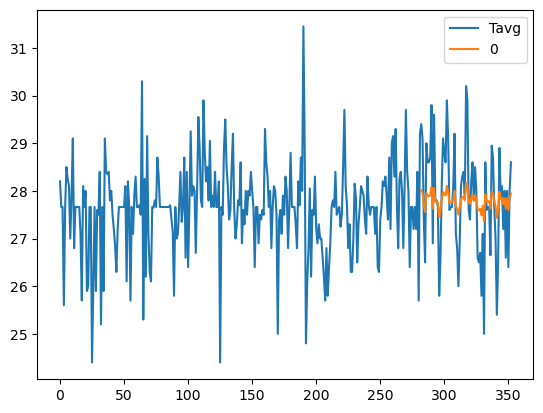

In [27]:
kan.plot()

In [30]:
new_data = [[354, 28.6],[355, 28.6],[356, 28.6],[357, 28.6],[358, 28.6],[359, 28.6],[360, 28.6]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.94572999, 27.94654977, 27.94736954, 27.94818932, 27.94900909,
       27.94982887, 27.95064864])

In [31]:
kan.to_json('Prediksi Kalimantan Selatan.json')